In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

import joblib


In [2]:
df = pd.read_csv("final_training_dataset.csv")


In [3]:
print(df.shape)
print(df.info())
print(df.describe())


(614, 13)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB
None
       ApplicantIncome  CoapplicantIncome     LoanAmount  Loan_Amount_Term  \
count     6.140000e

In [4]:
df['Gender'] = df['Gender'].fillna(df['Gender'].mode()[0])
df['Married'] = df['Married'].fillna(df['Married'].mode()[0])
df['Dependents'] = df['Dependents'].fillna(df['Dependents'].mode()[0])
df['Self_Employed'] = df['Self_Employed'].fillna(df['Self_Employed'].mode()[0])
df['LoanAmount'] = df['LoanAmount'].fillna(df['LoanAmount'].mean())
df['Loan_Amount_Term'] = df['Loan_Amount_Term'].fillna(df['Loan_Amount_Term'].mode()[0])
df['Credit_History'] = df['Credit_History'].fillna(df['Credit_History'].mode()[0])


In [5]:
df.drop_duplicates(inplace=True)


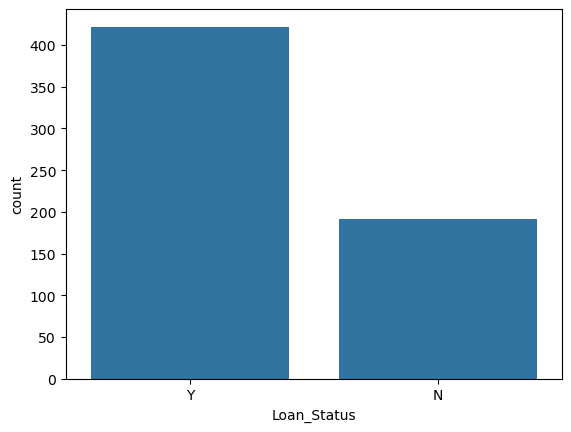

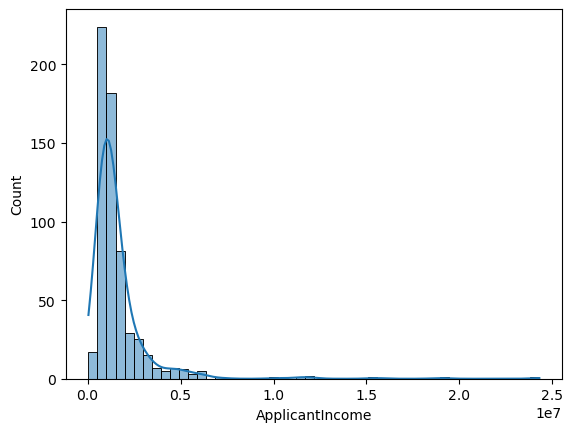

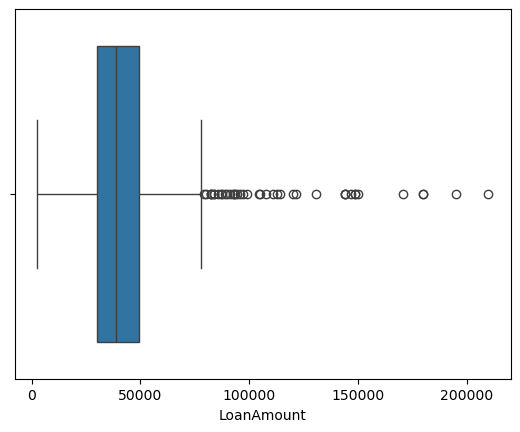

In [6]:
sns.countplot(x='Loan_Status', data=df)
plt.show()

sns.histplot(df['ApplicantIncome'], kde=True)
plt.show()

sns.boxplot(x=df['LoanAmount'])
plt.show()


In [7]:
le = LabelEncoder()

categorical_columns = [
    'Gender', 'Married', 'Dependents',
    'Education', 'Self_Employed',
    'Property_Area', 'Loan_Status'
]

for col in categorical_columns:
    df[col] = le.fit_transform(df[col])


In [8]:
X = df.drop(columns=['Loan_ID', 'Loan_Status'])
y = df['Loan_Status']

feature_names = X.columns


In [9]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)


In [10]:
X_train, X_test, y_train, y_test = train_test_split(
    X_scaled, y, test_size=0.2, random_state=42
)


In [11]:
model = RandomForestClassifier(
    n_estimators=100,
    random_state=42
)

model.fit(X_train, y_train)


,n_estimators,100
,criterion,'gini'
,max_depth,None
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,'sqrt'
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,bootstrap,True
,oob_score,False


Accuracy: 0.7642276422764228
              precision    recall  f1-score   support

           0       0.82      0.42      0.55        43
           1       0.75      0.95      0.84        80

    accuracy                           0.76       123
   macro avg       0.79      0.68      0.70       123
weighted avg       0.78      0.76      0.74       123



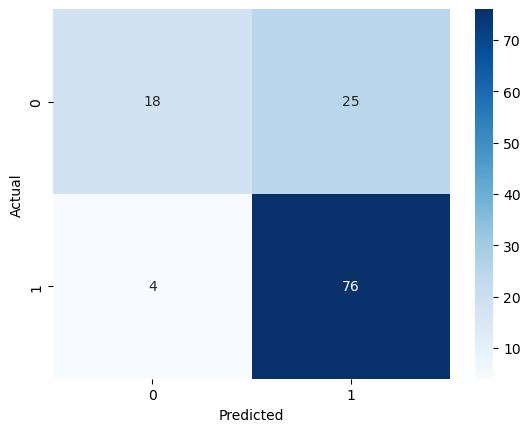

In [12]:
y_pred = model.predict(X_test)

print("Accuracy:", accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))

cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()


In [13]:
new_data = pd.DataFrame([[
    1,    # Gender
    1,    # Married
    0,    # Dependents
    1,    # Education
    0,    # Self_Employed
    500000,  # ApplicantIncome
    0,    # CoapplicantIncome
    15000,   # LoanAmount
    360,  # Loan_Amount_Term
    1,    # Credit_History
    2     # Property_Area
]], columns=feature_names)

new_data_scaled = scaler.transform(new_data)
prediction = model.predict(new_data_scaled)

if prediction[0] == 1:
    print("Loan Approved")
else:
    print("Loan Not Approved")


Loan Approved


In [14]:
joblib.dump(model, "loan_model.pkl")
joblib.dump(scaler, "scaler.pkl")
joblib.dump(feature_names, "feature_names.pkl")


['feature_names.pkl']